In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
import plotly.graph_objects as go
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
import plotly.figure_factory as ff
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df = df.rename(columns={'Recency': 'Last_Purchase','Dt_Customer':'Enrollment_Date','Response':'AcceptedCmp6'})

In [5]:
df['Enrollment_Date'] = pd.to_datetime(df['Enrollment_Date'], format='%d-%m-%Y')

In [6]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Enrollment_Date  Last_Purchase  MntWines  MntFruits  \
0            0      2012-09-04             58       635         88   
1            1      2014-03-08             38        11          1   
2            0      2013-08-21             26       426         49   
3            0      2014-02-10             26        11          4   
4            0      2014-01-19             94       173         43   
...        ...             ...            ...       ...        ...   
2235         1      2013-06-13             46       709         43   
2236         1      2014-06-10             56       406          0   
2237         0      2014-01-25             91       908         48   
2238         1      2014-01-24              8       428         30   
2239         1      2012-10-15             40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  

In [9]:
# generating profile report
# profile = ProfileReport(df)

In [10]:
# profile

#### FEATURE ENGINEERING

In [11]:
df['Age'] = 2014- df['Year_Birth']

In [12]:
df['Age'] 

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [13]:
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

#### Feature Transformations

In [14]:
df['Education'] = df['Education'].replace({'Basic': 0,'Graduation':1, '2n Cycle':2, 'Master':2, 'PhD':3})

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married':2, 'Together':2, 'Widow':1,'Divorced':1,'Alone':1,'Absurd':1,'YOLO':1, 'Single':1})

#### Feature Extraction

In [16]:
df['Members'] = df[['Kidhome', 'Teenhome', 'Marital_Status']].sum(axis='columns')

In [17]:
print("Customers' enrollment date starts wih {} and end at {} in the data set.".format(df['Enrollment_Date'].min().strftime('%Y-%m-%d'),  df['Enrollment_Date'].max().strftime('%Y-%m-%d')))
df['Enrollment_Duration'] = (df.loc[200]['Enrollment_Date'] - df['Enrollment_Date']).dt.days

Customers' enrollment date starts wih 2012-07-30 and end at 2014-06-29 in the data set.


In [18]:
df['Campaign_Acceptance'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis='columns')

In [19]:
df['Num_of_Transactions'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis='columns')

In [20]:
df['Total_Expenditure'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis='columns')

In [21]:
# average expenditure
df['Average_Expenditure'] = round(df['Total_Expenditure'] / df['Num_of_Transactions'],1)

In [22]:
# average transactions after enrollment
df['Average_Days'] = round(df['Enrollment_Duration'] / df['Num_of_Transactions'],1)

In [23]:
# number of customers did not who have 0 transaction
df[df['Num_of_Transactions'] == 0]

ID  Year_Birth  Education  Marital_Status    Income  Kidhome  \
655    5555        1975          1               1  153924.0        0   
981    3955        1965          1               1    4861.0        0   
1524  11110        1973          1               1    3502.0        1   
2132  11181        1949          3               2  156924.0        0   

      Teenhome Enrollment_Date  Last_Purchase  MntWines  MntFruits  \
655          0      2014-02-07             81         1          1   
981          0      2014-06-22             20         2          1   
1524         0      2013-04-13             56         2          1   
2132         0      2013-08-29             85         2          1   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
655                 1                1                 1             1   
981                 1                1                 0             1   
1524                1                0                 0             1   
2132                2                1                 1             1   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
655                   0                0                    0   
981                   0                0                    0   
1524                  0                0                    0   
2132                  0                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
655                   0                  0             0             0   
981                   0                 14             0             0   
1524                  0                 14             0             0   
2132                  0                  0             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  AcceptedCmp6  Age  \
655              0             0             0         0             0   39   
981              0             0             0         0             0   49   
1524             0             0             0         0             0   41   
2132             0             0             0         0             0   65   

      Members  Enrollment_Duration  Campaign_Acceptance  Num_of_Transactions  \
655         1                  142                    0                    0   
981         1                    7                    0                    0   
1524        2                  442                    0                    0   
2132        2                  304                    0                    0   

      Total_Expenditure  Average_Expenditure  Average_Days  
655                   6                  inf           inf  
981                   6                  inf           inf  
1524                  5                  inf           inf  
2132                  8                  inf           inf

In [24]:
df = df.dropna()

In [25]:
df.shape

(2216, 35)

In [26]:
# removing records with a 0 Num_of_Transactions value to avoid the potential error
df = df[df['Num_of_Transactions'] > 0]

In [27]:
# filtration of income columns from long dispersed values
df = df[df['Income']<300000]

In [28]:
data = pd.DataFrame(df, columns=['ID', 'Age', 'Education', 'Members', 'Income', 'Last_Purchase', 'Enrollment_Duration', 'Campaign_Acceptance', 'Average_Days',  'Average_Expenditure', 'Num_of_Transactions', 'Total_Expenditure', 'Complain'])

#### Dealing with Outliers 

In [29]:
# automated outlier ditection algorithm
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.03), max_features=1.0)

# fit IsolationForest
model.fit(data.iloc[:, 1:])

# array containing the score of being outlier
scores=model.decision_function(data.iloc[:, 1:])

# storing the aanomalies
anomaly=model.predict(data.iloc[:, 1:])

# adding the anomalies and score into dataframe
data['scores']=scores
data['anomaly']=anomaly

data.head()

ID  Age  Education  Members   Income  Last_Purchase  Enrollment_Duration  \
0  5524   57          1        1  58138.0             58                  663   
1  2174   60          1        3  46344.0             38                  113   
2  4141   49          1        2  71613.0             26                  312   
3  6182   30          1        3  26646.0             26                  139   
4  5324   33          3        3  58293.0             94                  161   

   Campaign_Acceptance  Average_Days  Average_Expenditure  \
0                    1          26.5                 64.7   
1                    0          18.8                  4.5   
2                    0          14.9                 37.0   
3                    0          17.4                  6.6   
4                    0           8.5                 22.2   

   Num_of_Transactions  Total_Expenditure  Complain    scores  anomaly  
0                   25               1617         0  0.074724        1  
1                    6                 27         0  0.137444        1  
2                   21                776         0  0.144458        1  
3                    8                 53         0  0.138821        1  
4                   19                422         0  0.097148        1

In [30]:
anomaly = data.loc[data['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 67


In [31]:
# dropping outliers
data = data.drop(anomaly_index, axis = 0).reset_index(drop=True)

# drop 'scores' and 'anomaly' column
data = data.drop(columns=['scores', 'anomaly'])

In [32]:
data.shape

(2144, 13)

#### FEATURE SCALING

In [33]:
# initialize the StandardScaler
df= data.copy()
scaler = StandardScaler()

# list of columns that don't need to be scaled
cols_except = ['ID']

# list of columns that need to be scaled
columns_to_scale = df.columns.difference(cols_except)

# copy the cleaned dataset
df_scaled = df.copy()

# applying the scaler to the necessary columns in the dataset
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# display the first few rows of the scaled data
df_scaled.head()

ID       Age  Education   Members    Income  Last_Purchase  \
0  5524  1.010620  -0.786010 -1.816975  0.350064       0.316577   
1  2174  1.267773  -0.786010  0.428972 -0.231469      -0.377716   
2  4141  0.324879  -0.786010 -0.694002  1.014484      -0.794291   
3  6182 -1.303755  -0.786010  0.428972 -1.202731      -0.794291   
4  5324 -1.046602   1.597591  0.428972  0.357707       1.566302   

   Enrollment_Duration  Campaign_Acceptance  Average_Days  \
0             1.531909             0.794273     -0.177960   
1            -1.190955            -0.500724     -0.442980   
2            -0.205773            -0.500724     -0.577211   
3            -1.062238            -0.500724     -0.491166   
4            -0.953323            -0.500724     -0.797488   

   Average_Expenditure  Num_of_Transactions  Total_Expenditure  Complain  
0             1.276264             1.336734           1.812810 -0.078105  
1            -1.007456            -1.158143          -0.966265 -0.078105  
2             0.225449             0.811497           0.342871 -0.078105  
3            -0.927791            -0.895525          -0.920821 -0.078105  
4            -0.335997             0.548878          -0.275866 -0.078105

In [34]:
# setting ID as the index column
df_scaled.set_index('ID', inplace=True)

pca = PCA().fit(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

pca = PCA(n_components= 6)
reduced_dim=pca.fit_transform(df_scaled)

df_scaled_pca= pd.DataFrame(data = reduced_dim, columns = ['pc1', 'pc2',
                                                        'pc3','pc4',
                                                        'pc5','pc6'])
# checking the dataset
df_scaled_pca.head()

pc1       pc2       pc3       pc4       pc5       pc6
0 -2.919751  1.768911 -0.072000  0.578822  0.112051 -0.364159
1  1.532686 -1.569315  0.114128 -0.048804  0.344274 -1.043346
2 -1.238936 -0.287413  0.549257 -0.013568  0.389689 -1.148576
3  2.083277 -0.788122  1.580832 -0.586599  0.107578 -0.509870
4 -0.051336 -1.531877 -0.004055  0.905843 -0.984298  1.596337

In [35]:
pca_df = df_scaled_pca.copy()

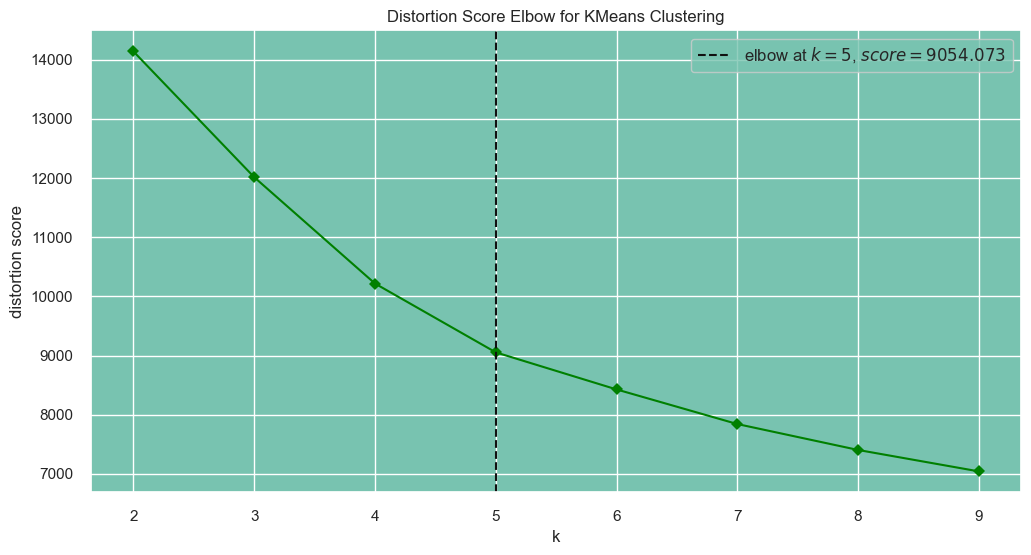

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#78C3B0'})

# set the color palette for the plot
sns.set_palette(['green'])

# creating a Figure and Axes for Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# set up the clustering object with the defined parameters
km = KMeans(random_state=42)

# create a KElbowVisualizer object with the clustering model,
visualizer = KElbowVisualizer(km, k=(2,10),locate_elbow=True, timings=False)

# fit the data to the visualizer
visualizer.fit(df_scaled_pca)

# finalize and render the figure
visualizer.show()    

In [37]:
kmeans = KMeans(n_clusters=2, max_iter=300, n_init=20, random_state = 180)
kmeans.fit(df_scaled_pca) 

# adding the labels of cluster to the dataframe of pca
df_scaled_pca['labels2'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({0: 942, 1: 1202})

In [38]:
colors = ['#e8000b','#33ff36']

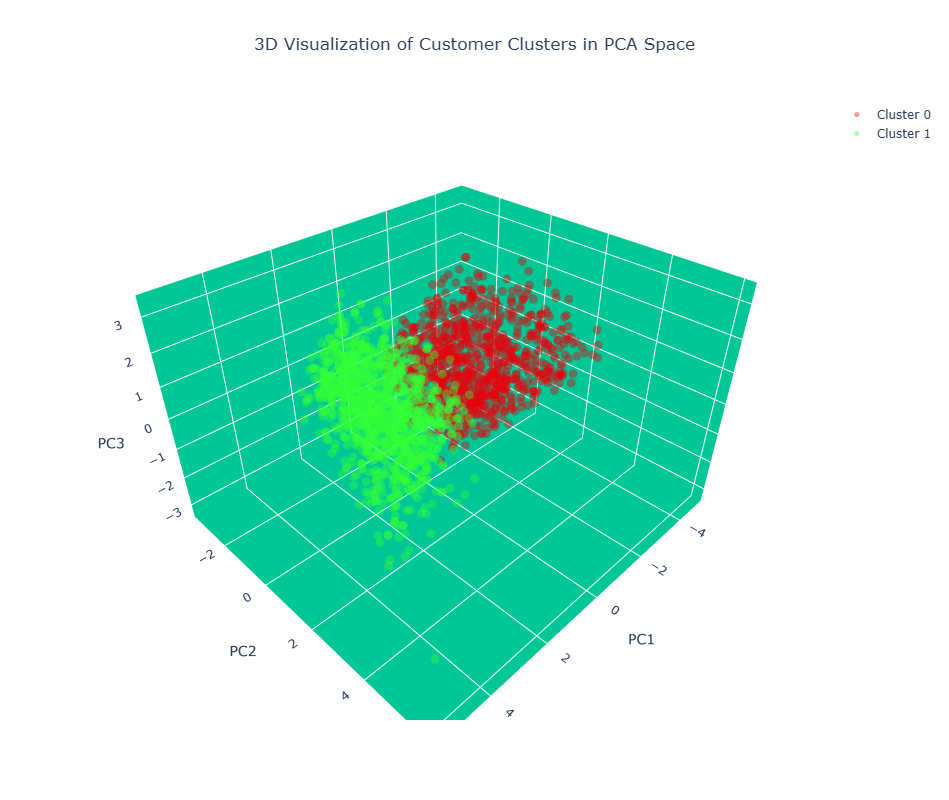

In [39]:
sns.set(rc={'axes.facecolor': '#78C3B0'}, style='darkgrid')
# Create separate data franomalyames for each cluster
cluster_0 = df_scaled_pca[df_scaled_pca['labels2'] == 0]
cluster_1 = df_scaled_pca[df_scaled_pca['labels2'] == 1]

# create a 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=cluster_0['pc1'], y=cluster_0['pc2'], z=cluster_0['pc3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['pc1'], y=cluster_1['pc2'], z=cluster_1['pc3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))


fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#00C795", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#00C795", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#00C795", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# show the plot
fig.show()

In [40]:
num_observations = len(df_scaled_pca)
X = df_scaled_pca.drop('labels2', axis=1)
label = df_scaled_pca['labels2']

sil_score = silhouette_score(X, label)

In [41]:
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+------------------------+--------------------+
|         Metric         |       Value        |
+------------------------+--------------------+
| Number of Observations |        2144        |
|    Silhouette Score    | 0.3007002314473939 |
+------------------------+--------------------+


#### Choosing the model for Clusters

In [42]:
data['labels2'] = df_scaled_pca['labels2'].astype('object')

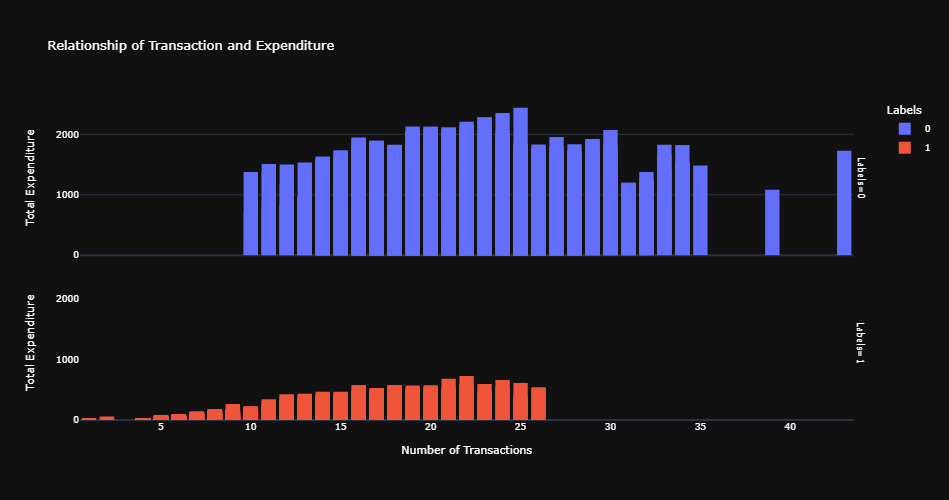

In [43]:
import plotly.express as px
import plotly.io as pio

barchart = px.bar(
    data_frame = data,
    x = 'Num_of_Transactions',
    y = 'Total_Expenditure',
    color = 'labels2',
    opacity = 1,
    orientation = 'v',
    barmode = 'overlay',
    facet_row = 'labels2',
    labels = {'labels2': 'Labels', 'Num_of_Transactions': 'Number of Transactions', 
              'Total_Expenditure':'Total Expenditure'},
    title='Relationship of Transaction and Expenditure',
    width= 900, height= 500,
    template= 'plotly_dark'
)
barchart.update_layout(legend = {'x':10, 'y':1.0},font=dict(size=9,color="white"))
barchart.update_traces(marker_line_width=0).update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
pio.show(barchart)


Cluster 0: top tier customer revenue and transactions number both are high

Cluster 1: shares less revenue and less transactions

#### Experimentation with Clusters

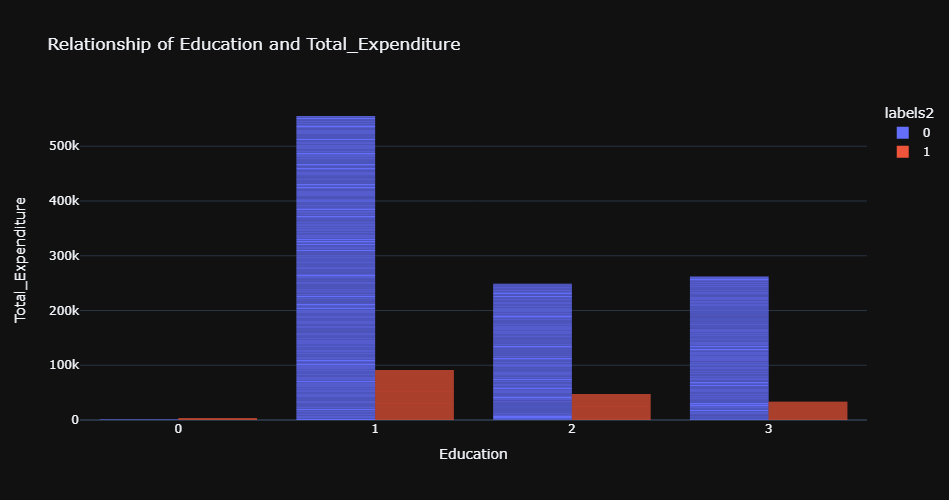

In [44]:
import plotly.express as px
import plotly.io as pio

barchart = px.bar(
    data_frame = data,
    x = 'Education',
    y = 'Total_Expenditure',
    color = 'labels2',
    barmode ='group',
    title='Relationship of Education and Total_Expenditure',
    width= 900, height= 500,
    template= 'plotly_dark',
    hover_name='Age', 
)
    
barchart.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

pio.show(barchart)

In [45]:
data.groupby('Education')['Total_Expenditure'].sum()

Education
0      4417
1    646807
2    296180
3    295756
Name: Total_Expenditure, dtype: int64

##### From the above graph and code output it is evident that more than half of the transactions or revenues come from the Graduates and larger share of these customers belongs to cluster 0. Next to Graduates, subsequently the larger larger share of revenues from customers who done Masters and phd.

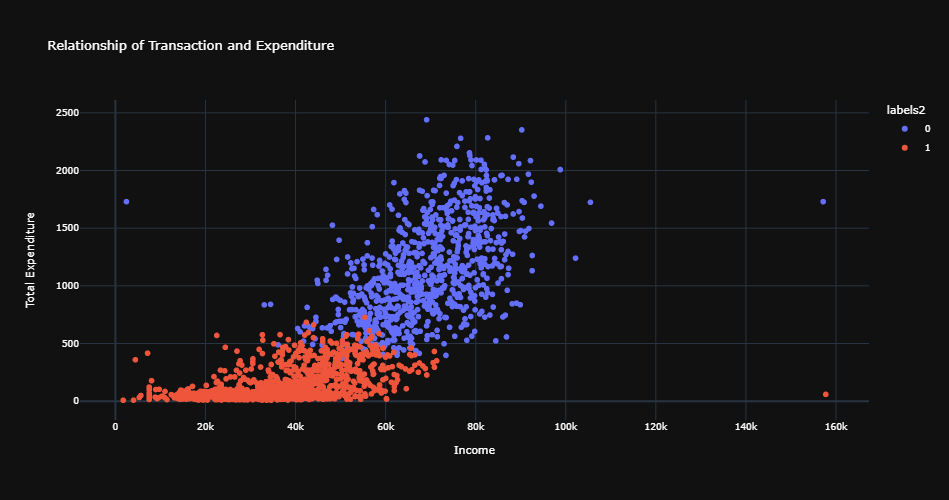

In [46]:
import plotly.express as px
import plotly.io as pio

scatter = px.scatter(
    data_frame = data,
    x = 'Income',
    y = 'Total_Expenditure',
    color = 'labels2',
    opacity = 1,
    orientation = 'v',
    labels = {'labels3': 'Labels', 'Num_of_Transactions': 'Number of Transactions', 
              'Total_Expenditure':'Total Expenditure'},
    title='Relationship of Transaction and Expenditure',
    width= 900, height= 500,
    template= 'plotly_dark'
)
scatter.update_layout(legend = {'x':10, 'y':1.0},font=dict(size=9,color="white"))
pio.show(scatter)

Cluster 0: Higher income and spending: top tier customers.

Cluster 1: Lower income and lower spending: less profitable customers.

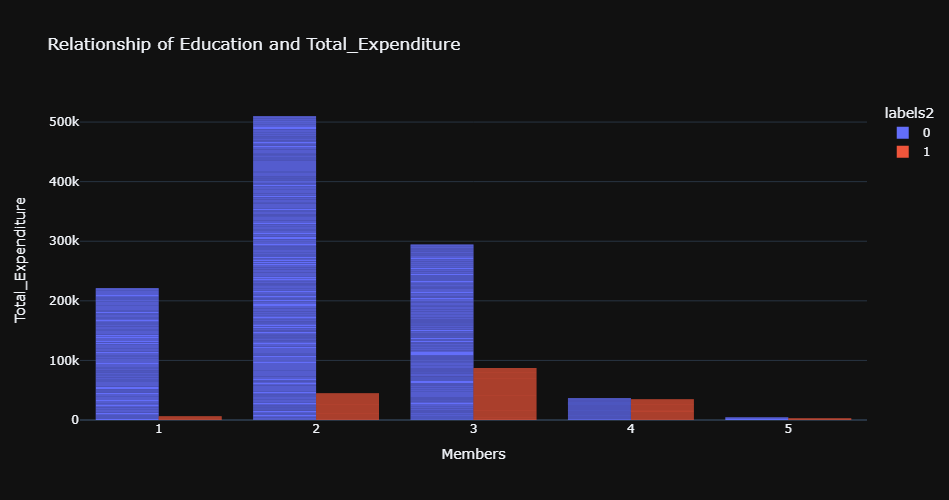

In [47]:
barchart = px.bar(
    data_frame = data,
    x = 'Members',
    y = 'Total_Expenditure',
    color = 'labels2',
    barmode ='group',
    title='Relationship of Education and Total_Expenditure',
    width= 900, height= 500,
    template= 'plotly_dark',
    hover_name='Age', 
)
    
barchart.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

pio.show(barchart)

Cluster 0: Couple and single are the most revenue generating customers and they share the bigger portion of this cluster.

Cluster 1: Have a combination of with 3 member's family at peak. Express less revenue

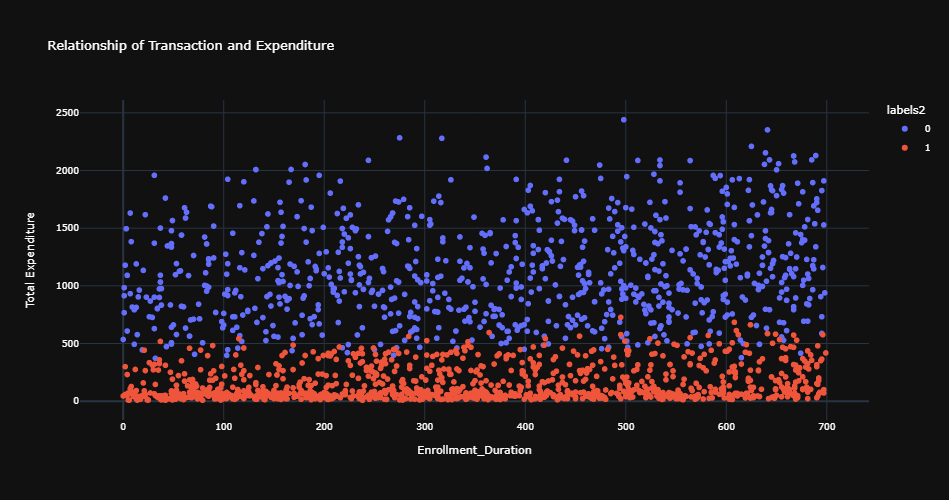

In [48]:
import plotly.express as px
import plotly.io as pio

scatter = px.scatter(
    data_frame = data,
    x = 'Enrollment_Duration',
    y = 'Total_Expenditure',
    color = 'labels2',
    opacity = 1,
    orientation = 'v',
    labels = {'labels3': 'Labels', 'Num_of_Transactions': 'Number of Transactions', 
              'Total_Expenditure':'Total Expenditure'},
    title='Relationship of Transaction and Expenditure',
    width= 900, height= 500,
    template= 'plotly_dark'
)
scatter.update_layout(legend = {'x':10, 'y':1.0},font=dict(size=9,color="white"))
pio.show(scatter)

### PROFILING THE CLUSTERS

As a result of cluster analysis, we received three groups of buyers (clusters):

Cluster label 0:

High income people (average income equals approximately 69000)

Average age is 46 years

Most of the customers who are graduate only belongs to here.

Have a family with offsprings but single pe ople and couples are concentrated in this cluster.

Purchase frequency is higher. Purchase volume is also higher. Responds campaining programs. Average days take for each transaction 18 days.

Cluster label 1:

Average income equals 37000 which is quite lower than cluster 0.

Average age is 42 years.

Have an education (Graduation, Masters, PhD)

Purchase frequency is lower. Average expenditure is quite lower than cluster 0. Average days take for one purchase is 42 around . These group of customers do not purchase so frequently. They are not loyal or profitable for company.

In [49]:
data.head(5)

ID  Age  Education  Members   Income  Last_Purchase  Enrollment_Duration  \
0  5524   57          1        1  58138.0             58                  663   
1  2174   60          1        3  46344.0             38                  113   
2  4141   49          1        2  71613.0             26                  312   
3  6182   30          1        3  26646.0             26                  139   
4  5324   33          3        3  58293.0             94                  161   

   Campaign_Acceptance  Average_Days  Average_Expenditure  \
0                    1          26.5                 64.7   
1                    0          18.8                  4.5   
2                    0          14.9                 37.0   
3                    0          17.4                  6.6   
4                    0           8.5                 22.2   

   Num_of_Transactions  Total_Expenditure  Complain labels2  
0                   25               1617         0       0  
1                    6                 27         0       1  
2                   21                776         0       0  
3                    8                 53         0       1  
4                   19                422         0       1

### MODEL BUILDING

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
import pickle

In [57]:
data['labels2'] = data['labels2'].astype(int)
X = data.drop(columns=["ID", "labels2"])
y = data["labels2"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [65]:
best_model = None
best_score = 0
# Initialize cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Cross-validation scores (returns accuracy scores for each fold)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Calculate average score across folds
    mean_score = np.mean(cv_scores)
    print(f"Model: {name}")
    print(f"Cross-validated Accuracy: {mean_score:.2f}")

    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print()

Model: Logistic Regression
Cross-validated Accuracy: 0.96
Model: Logistic Regression
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
[[201   0]
 [  0 228]]

Model: Decision Tree
Cross-validated Accuracy: 0.98
Model: Decision Tree
Accuracy: 0.97, Precision: 0.96, Recall: 0.98, F1 Score: 0.97
[[192   9]
 [  5 223]]

Model: Random Forest
Cross-validated Accuracy: 0.98
Model: Random Forest
Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98
[[197   4]
 [  5 223]]



#### Using Random Forest For Training

In [73]:
RFmodel = RandomForestClassifier()

In [75]:
RFmodel.fit(X_train, y_train)
with open("best_model.pkl", "wb") as f:
    pickle.dump(RFmodel, f)

In [76]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [88]:
new_data = pd.DataFrame({
    "Age": [25],
    "Education": [2],
    "Members": [2],
    "Income": [56000],
    "Last_Purchase": [300],
    "Enrollment_Duration": [30],
    "Campaign_Acceptance": [1],
    "Average_Days": [20.0],
    "Average_Expenditure": [15.0],
    "Num_of_Transactions": [15],
    "Total_Expenditure": [350],
    "Complain": [0]
})

new_data = scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data)
print("Prediction for new data:", new_prediction)



if(new_prediction == 0):
    print("High income people (average income equals approximately 69000)\nAverage age is 46 years\nMost of the customers who are graduate only belongs to here.\nHave a family with offsprings but single pe ople and couples are concentrated in this cluster.\nPurchase frequency is higher.\nPurchase volume is also higher.\nResponds campaining programs.\nAverage days take for each transaction 18 days.")
else :
    print("Average income equals 37000 which is quite lower than cluster 0.\nAverage age is 42 years.\nHave an education (Graduation, Masters, PhD)\nPurchase frequency is lower. Average expenditure is quite lower than cluster 0. Average days take for one purchase is 42 around . These group of customers do not purchase so frequently. They are not loyal or profitable for company.")

Prediction for new data: [1]
Average income equals 37000 which is quite lower than cluster 0.
Average age is 42 years.
Have an education (Graduation, Masters, PhD)
Purchase frequency is lower. Average expenditure is quite lower than cluster 0. Average days take for one purchase is 42 around . These group of customers do not purchase so frequently. They are not loyal or profitable for company.
